In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [8]:
# Load data file
bank=pd.read_csv('fold1.csv')
bank_c=pd.read_csv('fold1c.csv')
question_data = bank.copy()
question_data_c=bank_c.copy()
question_data_c['C'] = question_data_c['C'].map( {'Vata':0, 'Kapha':1,'Pitta':2} )
# Convert categorical variables to dummies
question_data_original=question_data
question_data_class=question_data_c
question_data.drop('C', axis=1, inplace=True)
question_data.drop('SampleID', axis=1, inplace=True)
question_data_class.drop('SampleID', axis=1, inplace=True)
question_with_dummies = pd.get_dummies(data=question_data)

In [9]:
# standardizing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
P_scaled=scaler.fit_transform(question_with_dummies)
P_scaled=pd.DataFrame(P_scaled)
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(P_scaled)
print(P_pca.shape)

(147, 97)


In [10]:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix  
X=P_pca
y=question_data_class
X_train=question_with_dummies[question_with_dummies['Fold']==1]
X_test=question_with_dummies[question_with_dummies['Fold']==0]
y_train=question_data_class[question_data_class['Fold']==1]
y_train.drop('Fold', axis=1, inplace=True)
y_test=question_data_class[question_data_class['Fold']==0]
y_test.drop('Fold', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.896551724137931]


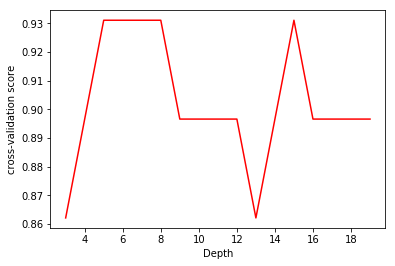

In [12]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    clf.fit(X_train,y_train)
    scores = clf.score(X_test, y_test)
    #cross_val_score(estimator=clf, X=X_test, y=y_test, cv=5)
    depth.append(scores.mean())
print(depth)
n_range=list(range(3,20))

from matplotlib import pyplot as plt
plt.plot(n_range,depth,color="red")
plt.xlabel('Depth')
plt.ylabel('cross-validation score')
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('dtp1f_d.png',dpi=200)

In [13]:
from sklearn import neighbors
depth=4
clf = clf = tree.DecisionTreeClassifier(max_depth=depth)
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)  
## See how the model performs on the test data.
clf.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        12
          1       1.00      0.89      0.94         9
          2       0.80      1.00      0.89         8

avg / total       0.94      0.93      0.93        29



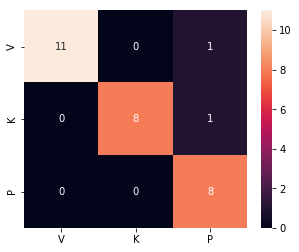

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in "VKP"],
                  columns = [i for i in "VKP"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True)
fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('dtp1fc_d.png',dpi=200)